In [151]:
from datetime import date
from random import uniform
from random import choice
import importlib
import math

import matplotlib.pyplot as plt
from sklearn import neural_network, linear_model, svm, ensemble
from sklearn.model_selection import train_test_split

from pynet import *
from stockmanager import *


importlib.reload(util)
importlib.reload(portfolio)
importlib.reload(stock)
importlib.reload(network)
importlib.reload(netutil)

<module 'pynet.netutil' from '/Users/xlanzhou/Desktop/Richard/stocks/pynet/netutil.py'>

In [199]:
# get X and y from 2005 to 2010

INPUT_SIZE = 30 # number of days to feed into nn

rawData = [item[1:] for item in util.getStockPrice('MSFT', date(2005, 1, 4), date(2010, 1, 4))]
X = [[X[j][k] for j in range(i - INPUT_SIZE, i) for k in range(6)] for i in range(len(rawData))]

y = util.createTrainingData('MSFT', date(2005, 1, 4), date(2010, 1, 4), 60)

In [201]:
# train nn with stock data

# nn = linear_model.SGDRegressor(alpha=0.002)
# nn = neural_network.MLPRegressor(activation='logistic')
# nn = linear_model.Ridge()
# nn = svm.SVR(kernel='linear') # WARNING: really slow!
nn = ensemble.AdaBoostRegressor()
# nn = linear_model.Lasso(max_iter=1e5)
# nn = linear_model.ElasticNet(max_iter=1e6)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nn.fit(X_train, y_train)
print(nn.score(X_test, y_test))

predicted = nn.predict(X)

0.549507911178


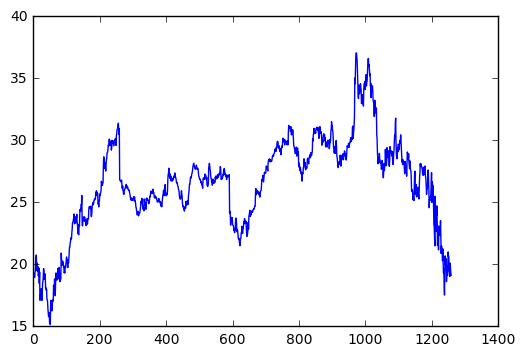

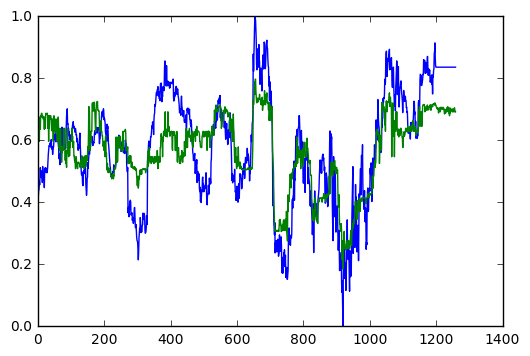

In [202]:
# Plot graphs of raw stock data & simple moving average (X) and training data (y)
plt.plot([item[3] for item in X])
plt.show()

plt.plot(y)
plt.plot(predicted)
plt.show()

In [105]:
# download stock data for use in getting stock price

util.downloadStockData('MSFT', date(2005, 1, 4), date(2015, 1, 4))

2517
